# General tasks and directions

- Add your name, today's date, and the assignment title to the designated cell.
- Write your answers in the cells that contain `Add your answer here.` line.
- Write your code in the cells that contain `# Add your implementation here.` line.
- Use autograder tests that are provided for your convenience.
- Don't change or delete any provided code (including [cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) such as `%%capture output`).


## Add your name, today's date, and the assignment title

author: Muhammad Mughees Warraich

date: Apr 27

assignment: Exercise 7


# Exercise

*Data manipulation and visualization*

This assignment is individual and you agree to submit your own work.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas import Series, DataFrame


## Task 1

Read the provided *1962_2006_walmart_store_openings.csv* into a `DataFrame` using `storenum` as index.

Convert all column names to lowercase.

In [32]:
# Add your implementation here.
df = pd.read_csv("1962_2006_walmart_store_openings.csv")
df = df.set_index('storenum')


In [33]:
df

,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
storenum,,,,,,,,,,,,,,,
1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,1/27/06,1/27/06,0.0,17,19,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006
3347,1/23/06,1/23/06,0.0,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006
5485,1/27/06,NaN,NaN,17,31,2500 W 95th St,Evergreen Park,IL,60805,Wal-Mart,41.719933,-87.70249,1,27,2006


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 1 to 5193
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OPENDATE    2992 non-null   object 
 1   date_super  1946 non-null   object 
 2   conversion  1946 non-null   float64
 3   st          2992 non-null   int64  
 4   county      2992 non-null   int64  
 5   STREETADDR  2992 non-null   object 
 6   STRCITY     2992 non-null   object 
 7   STRSTATE    2992 non-null   object 
 8   ZIPCODE     2992 non-null   int64  
 9   type_store  2992 non-null   object 
 10  LAT         2992 non-null   float64
 11  LON         2992 non-null   float64
 12  MONTH       2992 non-null   int64  
 13  DAY         2992 non-null   int64  
 14  YEAR        2992 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 374.0+ KB


## Task 2

Set data types of the columns as follows:

- `opendate`: date
- `date_super`: date
- `conversion`: boolean
- `st`: integer
- `county`: integer
- `streetaddr`: string
- `strcity`: string
- `strstate`: string
- `zipcode`: integer
- `type_store`: string
- `lat`: float
- `lon`: float
- `month`: integer
- `day`: integer
- `year`: integer

In [35]:
# Add your implementation here.
df['OPENDATE'] = pd.to_datetime(df['OPENDATE'])
df['date_super'] = pd.to_datetime(df['date_super'])
df = df.astype({"conversion": bool})
df = df.astype({"st": int,"county": int, "STREETADDR": ('string'),"STRCITY": ('string')})
df = df.astype({"STRSTATE": ('string'), "ZIPCODE": int ,"type_store": ('string'), "LAT": float})
df = df.astype({"LON": float, "MONTH": int ,"DAY": int, "YEAR": int})

In [36]:
cutoff_date = pd.to_datetime('01-31-2006')

df.loc[df.OPENDATE > cutoff_date, 'OPENDATE'] -= pd.DateOffset(years=100)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 1 to 5193
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OPENDATE    2992 non-null   datetime64[ns]
 1   date_super  1946 non-null   datetime64[ns]
 2   conversion  2992 non-null   bool          
 3   st          2992 non-null   int64         
 4   county      2992 non-null   int64         
 5   STREETADDR  2992 non-null   string        
 6   STRCITY     2992 non-null   string        
 7   STRSTATE    2992 non-null   string        
 8   ZIPCODE     2992 non-null   int64         
 9   type_store  2992 non-null   string        
 10  LAT         2992 non-null   float64       
 11  LON         2992 non-null   float64       
 12  MONTH       2992 non-null   int64         
 13  DAY         2992 non-null   int64         
 14  YEAR        2992 non-null   int64         
dtypes: bool(1), datetime64[ns](2), float64(2), int64(6), string(4)
memory us

In [38]:
df

,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
storenum,,,,,,,,,,,,,,,
1,1962-07-01,1997-03-01,True,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
2,1964-08-01,1996-03-01,True,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
4,1965-08-01,2002-03-01,True,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
8,1967-10-01,1993-03-01,True,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
7,1967-10-01,NaT,True,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,2006-01-27,2006-01-27,False,17,19,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006
3347,2006-01-23,2006-01-23,False,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006
5485,2006-01-27,NaT,True,17,31,2500 W 95th St,Evergreen Park,IL,60805,Wal-Mart,41.719933,-87.70249,1,27,2006


## Task 3

Create a new column, `fips`, that stores the FIPS county code as a result of concatenation of the `st` and `county` values.

In [39]:
# Add your implementation here.
df['st']=df['st'].astype(str)
df['county']=df['county'].astype(str)
df['st'] = df['st'].str.zfill(2)
df['county'] = df['county'].str.zfill(3)
df['fips'] = df[['st', 'county']].apply(lambda x: ''.join(x), axis=1)


In [40]:
df

,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR,fips
storenum,,,,,,,,,,,,,,,,
1,1962-07-01,1997-03-01,True,05,007,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962,05007
2,1964-08-01,1996-03-01,True,05,009,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964,05009
4,1965-08-01,2002-03-01,True,05,007,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965,05007
8,1967-10-01,1993-03-01,True,05,029,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967,05029
7,1967-10-01,NaT,True,05,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967,05119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,2006-01-27,2006-01-27,False,17,019,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006,17019
3347,2006-01-23,2006-01-23,False,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006,12105
5485,2006-01-27,NaT,True,17,031,2500 W 95th St,Evergreen Park,IL,60805,Wal-Mart,41.719933,-87.70249,1,27,2006,17031


In [41]:
df.fips

storenum
1       05007
2       05009
4       05007
8       05029
7       05119
        ...  
5403    17019
3347    12105
5485    17031
3425    48201
5193    06065
Name: fips, Length: 2992, dtype: object

## Task 4

Plot any column(s) from the `DataFrame` using its *opendate* property as `DatetimeIndex`.

Hint: You may resample the data if you like.

In [42]:
df

,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR,fips
storenum,,,,,,,,,,,,,,,,
1,1962-07-01,1997-03-01,True,05,007,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962,05007
2,1964-08-01,1996-03-01,True,05,009,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964,05009
4,1965-08-01,2002-03-01,True,05,007,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965,05007
8,1967-10-01,1993-03-01,True,05,029,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967,05029
7,1967-10-01,NaT,True,05,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967,05119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,2006-01-27,2006-01-27,False,17,019,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006,17019
3347,2006-01-23,2006-01-23,False,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006,12105
5485,2006-01-27,NaT,True,17,031,2500 W 95th St,Evergreen Park,IL,60805,Wal-Mart,41.719933,-87.70249,1,27,2006,17031


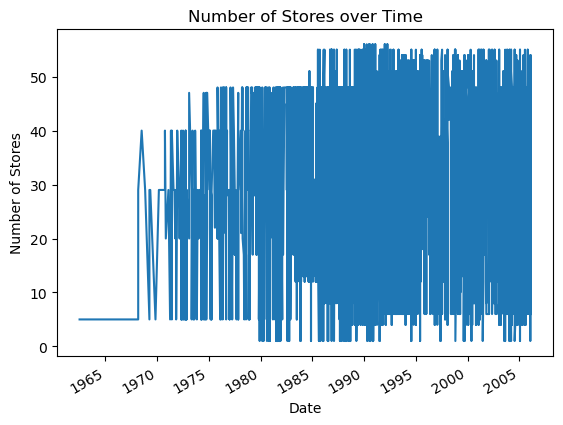

In [43]:
# Add your implementation here.

df['st']=df['st'].astype(int)
df['OPENDATE'] = pd.to_datetime(df['OPENDATE'])
df.set_index('OPENDATE', inplace=True)

df['st'].plot()

plt.title('Number of Stores over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stores')

plt.show()

## Task 5

Plot current number of stores (ignoring their supercenter status) by state on the map.

Hint: Texas should have the most stores with 315; Alaska, Hawaii, and New England states should have 0; Iowa should have 55.

In [44]:
df

,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR,fips
OPENDATE,,,,,,,,,,,,,,,
1962-07-01,1997-03-01,True,5,007,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962,05007
1964-08-01,1996-03-01,True,5,009,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964,05009
1965-08-01,2002-03-01,True,5,007,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965,05007
1967-10-01,1993-03-01,True,5,029,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967,05029
1967-10-01,NaT,True,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967,05119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-01-27,2006-01-27,False,17,019,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006,17019
2006-01-23,2006-01-23,False,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006,12105
2006-01-27,NaT,True,17,031,2500 W 95th St,Evergreen Park,IL,60805,Wal-Mart,41.719933,-87.70249,1,27,2006,17031


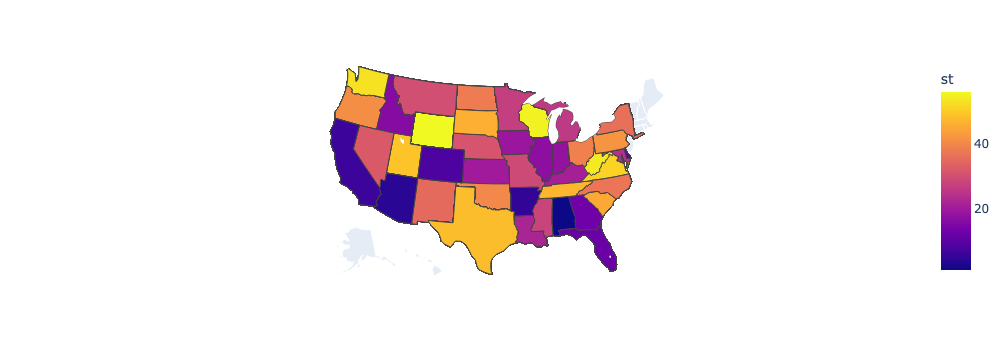

In [46]:
# Add your implementation here.
fig = px.choropleth(df, locations="STRSTATE", color="st",
projection="albers usa", locationmode="USA-states")
fig.show()

## Submission Checklist

- [ ] Your name, today's date, and the assignment title in the designated cell.
- [ ] Your answers in the designated cells (if required).
- [ ] Your code runs and produces the expected output.
- [ ] The validity of your code is verified by autograders (if provided).
- [ ] Restart the kernel and run all cells (in the menubar, select *Kernel*, then *Restart Kernel and Run All Cells*).
- [ ] Save the notebook.
- [ ] Submit the assignment.
